In [1]:
!nvidia-smi

Sat Dec  7 19:43:30 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   37C    P8              6W /   30W |     107MiB /   4096MiB |      6%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!yolo task=detect mode=train model=yolov8l.pt data="D:/Helmet_Detection_Colab/Helmet Detection.v1i.yolov8/data.yaml" epochs=100 imgsz=1280 batch=4 half

^C


In [ ]:
import cv2
import math
!pip install cvzone
import cvzone
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26298 sha256=490657a955d17f928bebdacd2006f90dca0c8b708c4eb073a5f1258a88fb85b9
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone


In [ ]:
# Load YOLO model with custom weights
yolo_model = YOLO("/content/Weights/best.pt")

# Define class names
class_labels = ['With Helmet', 'Without Helmet']

In [ ]:
# Load the image
image_path = "/content/Media/10025.jpg"
img = cv2.imread(image_path)

In [ ]:
# Perform object detection
results = yolo_model(img)


0: 640x480 1 Without Helmet, 47.0ms
Speed: 5.4ms preprocess, 47.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
# Loop through the detections and draw bounding boxes
for r in results:
    boxes = r.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        w, h = x2 - x1, y2 - y1
        cvzone.cornerRect(img, (x1, y1, w, h))
        conf = math.ceil((box.conf[0] * 100)) / 100
        cls = int(box.cls[0])
        color = (0, 255, 0) if cls == 0 else (0, 0, 255)
        cvzone.cornerRect(img, (x1, y1, w, h), colorC=color)
        
        if conf > 0.1:
            cvzone.putTextRect(img, f'{class_labels[cls]} {conf}', (x1, y1 - 10), scale=0.8, thickness=1, colorR=color)

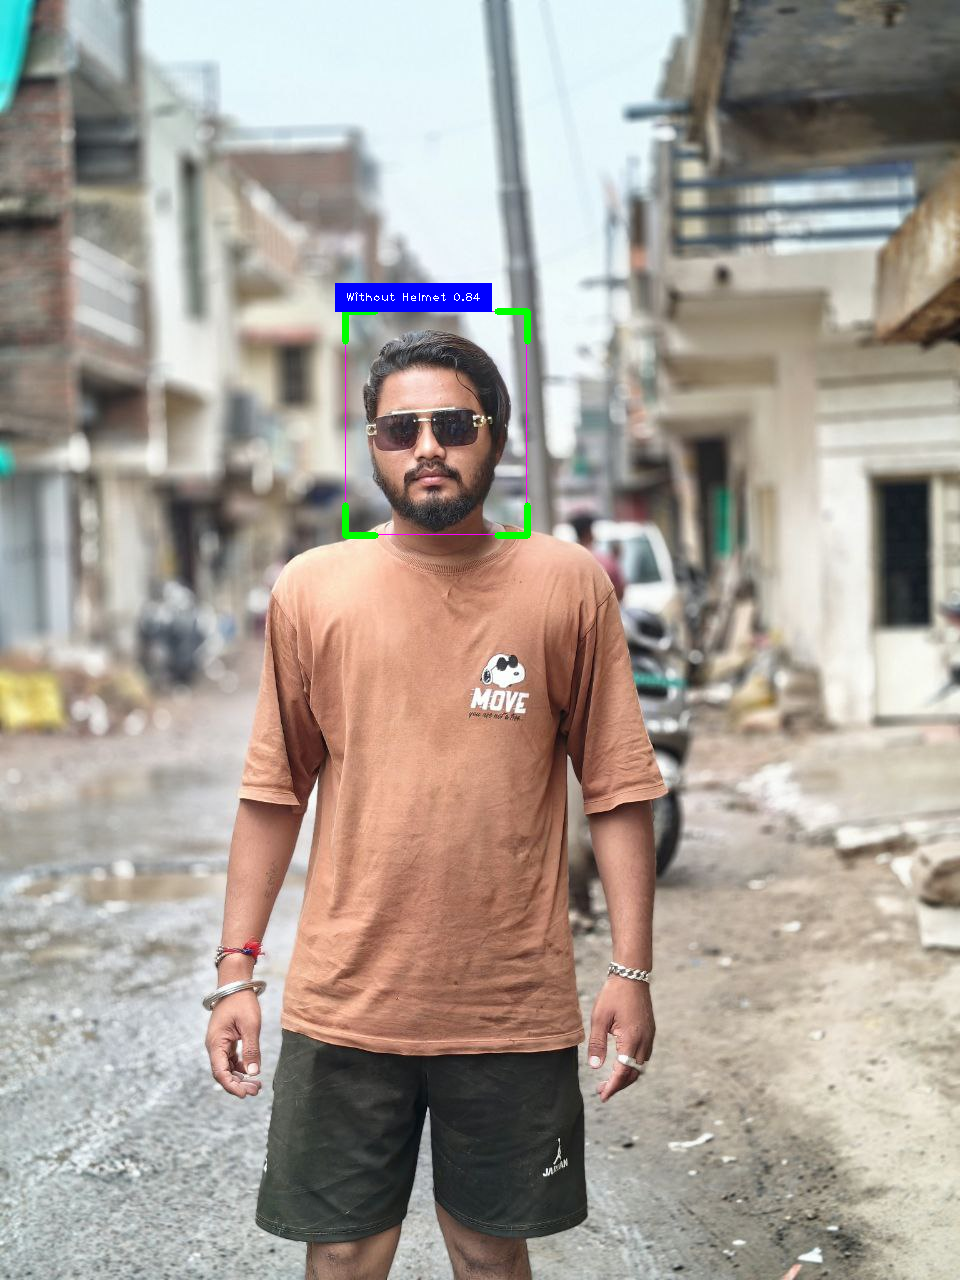

In [ ]:
# Display the image with detections
cv2_imshow(img)